In [30]:
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd

import numpy as np
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import adjusted_rand_score, silhouette_score, davies_bouldin_score
from sklearn import preprocessing 
import plotly.express as px

## Importing Datasets

In [31]:
datasets = {
    "Spherical Clusters": pd.read_csv('./Datasets/Speherical_Clusters.csv'),
    "Moon Clusters": pd.read_csv('./Datasets/moons_Clusters.csv'),
    "Nested Clusters": pd.read_csv('./Datasets/Nested_Clusters.csv'),
    "Hierarchical Structure": pd.read_csv('./Datasets/Mall_Customers.csv')
    
}
label_encoder = preprocessing.LabelEncoder() 

#encode gender
datasets['Hierarchical Structure']['Gender'] = label_encoder.fit_transform(datasets['Hierarchical Structure']['Gender'])

## Data Preprocessing Function

In [32]:
scaler = StandardScaler()
encoder = OneHotEncoder(drop="if_binary", sparse_output=False)


def preprocess(
    dataset_name, return_original=False, return_scaler=False, return_encoder=False
):
    data = datasets[dataset_name]
    if dataset_name == "Hierarchical Structure":
        enc_gender = encoder.fit_transform(data[["Gender"]])
        scaled_numerical = scaler.fit_transform(
            data[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]
        )
        X = np.hstack((enc_gender, scaled_numerical))
        y = None

    else:
        data = data.to_numpy()
        #X = scaler.fit_transform(data[:, :-1])
        X = data
        y = data[:, -1]

    result = [X, y]
    if return_original:
        result.append(data)

    return tuple(result)




## Function to plot clustering result

In [33]:
def plot_clustering_and_truth(X, y, model):
    """
    Plots the clustering results and the ground truth labels in separate graphs.

    Parameters:
    - X: The input data (features).
    - y: The ground truth labels.
    - model: The fitted Gaussian Mixture Model.

    Returns:
    - None
    """
    # Predict the cluster labels using the fitted model
    cluster_labels = model.predict(X)

    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Plot GMM clustering results
    axes[0].scatter(X[:, 0], X[:, 1], c=cluster_labels, s=30, cmap='viridis', alpha=0.6)
    axes[0].set_title('GMM Clustering Results')
    axes[0].set_xlabel('Feature 1')
    axes[0].set_ylabel('Feature 2')

    # Plot ground truth labels
    axes[1].scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='jet', alpha=0.6)
    axes[1].set_title('Ground Truth Labels')
    axes[1].set_xlabel('Feature 1')
    axes[1].set_ylabel('Feature 2')

    plt.tight_layout()
    plt.show()

## Parameter Grid for Gaussian Mixture Model Optimization

In [34]:
params = {
    'n_components': [2,3,4,5],
    'covariance_type': ['full', 'tied', 'diag', 'spherical'],
    'max_iter': [100, 200, 300], 
    'init_params': ['kmeans','random_from_data','k-means++', 'random'],  
    'tol': [1e-3 ,1e-4,1e-5,1e-6],  
}

## Evaluation Function

In [35]:
def evaluate_gmm_model(X, y=None, gmm_model=None, ground_truth=True):
    """
    Evaluates the Gaussian Mixture Model using various metrics.

    Parameters:
    X : array-like, shape (n_samples, n_features)
        The input data.
    y : array-like, shape (n_samples,), optional
        The ground truth labels. Default is None.
    gmm_model : GaussianMixture
        The trained GMM model.
    ground_truth : bool
        Whether to include ground truth evaluation metrics.

    Returns:
    metrics : dict
        A dictionary containing silhouette score, ARI (if ground_truth is True), and Davies-Bouldin index.
    """
    # Predict cluster labels
    labels = gmm_model.predict(X)

    # Calculate evaluation metrics
    silhouette_avg = silhouette_score(X, labels)
    db_score = davies_bouldin_score(X, labels)

    metrics = {
        "Silhouette Score": silhouette_avg,
        "Davies-Bouldin Score": db_score
    }

    # Include ARI if ground truth is provided
    if ground_truth and y is not None:
        ari = adjusted_rand_score(y, labels)
        metrics["Adjusted Rand Index"] = ari

    return metrics

## GMM on Spherical Clusters

c:\Users\liang\anaconda3\lib\site-packages\sklearn\mixture\_base.py:270: ConvergenceWarning:

Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.

c:\Users\liang\anaconda3\lib\site-packages\sklearn\mixture\_base.py:270: ConvergenceWarning:

Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.

c:\Users\liang\anaconda3\lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning:

invalid value encountered in cast



Best Parameters: {'covariance_type': 'tied', 'init_params': 'kmeans', 'max_iter': 100, 'n_components': 4, 'tol': 0.001}
Best BIC Score: 2.814394238718843


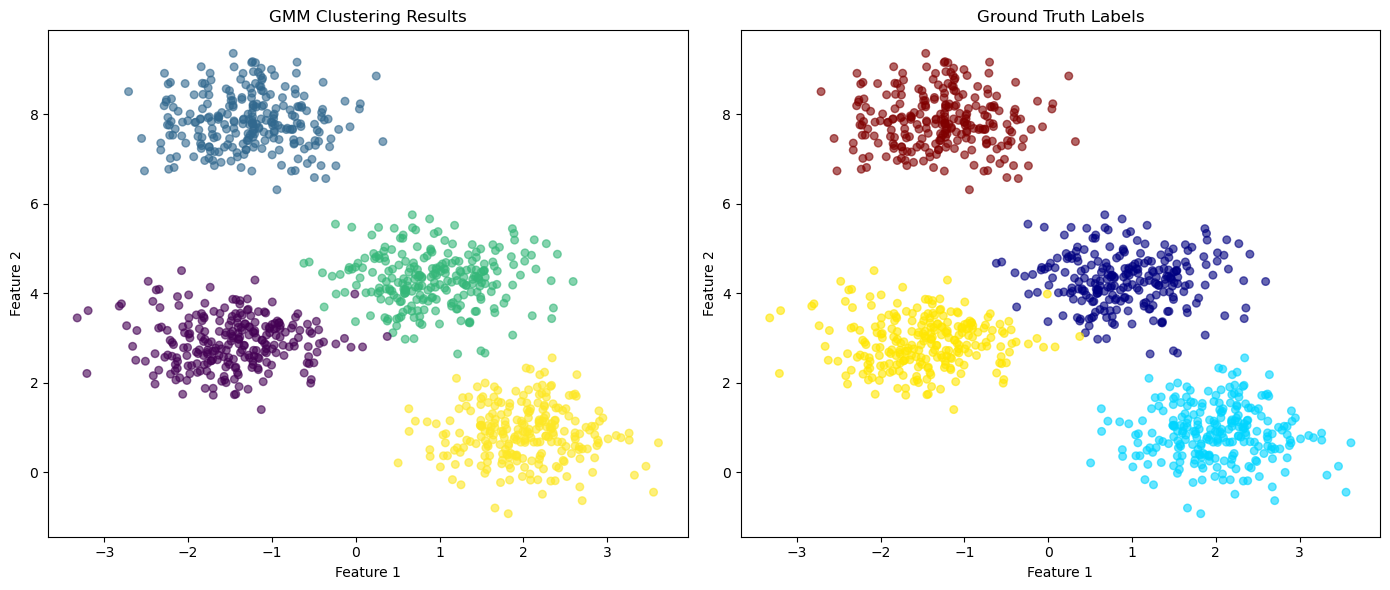

In [37]:
X, y = preprocess("Spherical Clusters")
gmm = GaussianMixture(random_state=0)
grid_search = GridSearchCV(estimator=gmm, param_grid=params, cv=5)
grid_search.fit(X)


print("Best Parameters:", grid_search.best_params_)
print("Best BIC Score:", grid_search.best_score_)

# Plot the clustering results
best_gmm_model = grid_search.best_estimator_
plot_clustering_and_truth(X, y, best_gmm_model)


### Performance Evaluation

In [38]:
# Evaluate the model
evaluation_metrics = evaluate_gmm_model(X, y, best_gmm_model)

# Print the evaluation metrics
for metric, score in evaluation_metrics.items():
    print(f"{metric}: {score:.4f}")

Silhouette Score: 0.7254
Davies-Bouldin Score: 0.3843
Adjusted Rand Index: 1.0000


## GMM on Moon Clusters

c:\Users\liang\anaconda3\lib\site-packages\sklearn\mixture\_base.py:270: ConvergenceWarning:

Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.

c:\Users\liang\anaconda3\lib\site-packages\sklearn\mixture\_base.py:270: ConvergenceWarning:

Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.

c:\Users\liang\anaconda3\lib\site-packages\sklearn\mixture\_base.py:270: ConvergenceWarning:

Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.

c:\Users\liang\anaconda3\lib\site-packages\sklearn\mixture\_base.py:270: ConvergenceWarning:

Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.

c:\Users\liang\anaconda3\lib\site-packages\sklearn\mixture\_base.py:270:

Best Parameters: {'covariance_type': 'diag', 'init_params': 'kmeans', 'max_iter': 100, 'n_components': 2, 'tol': 0.001}
Best BIC Score: 3.8414378611070332


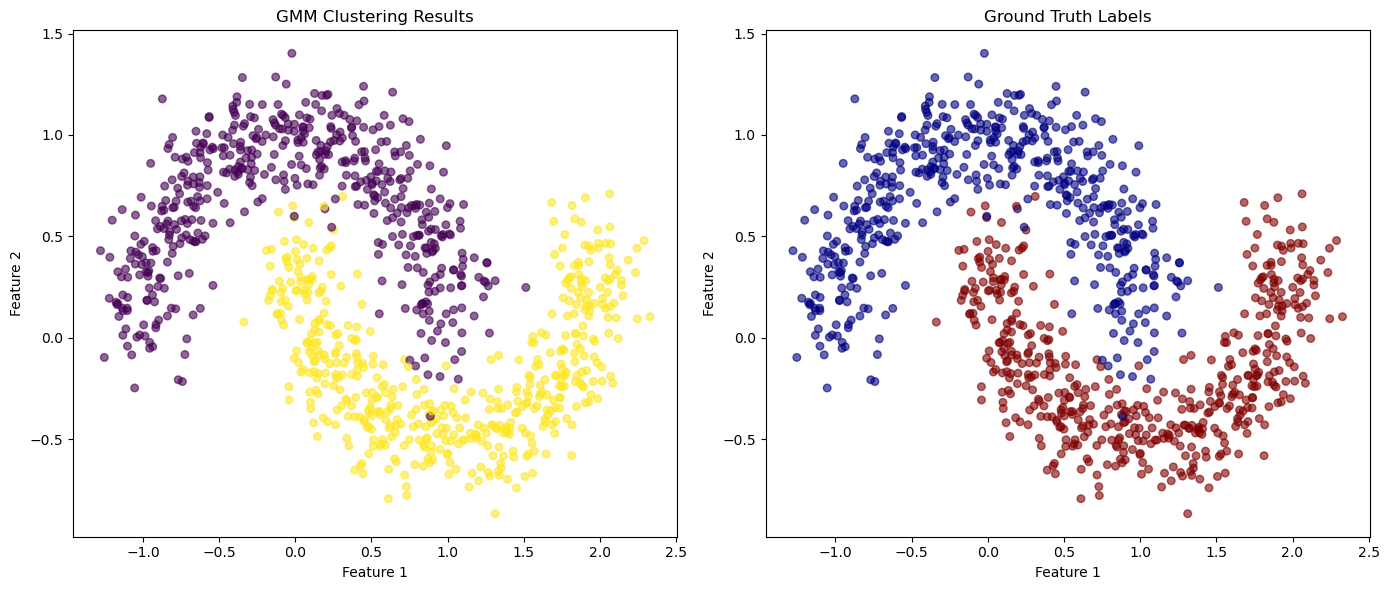

In [40]:
X, y = preprocess("Moon Clusters")
gmm = GaussianMixture(random_state=0)
grid_search = GridSearchCV(estimator=gmm, param_grid=params, cv=5)
grid_search.fit(X)


print("Best Parameters:", grid_search.best_params_)
print("Best BIC Score:", grid_search.best_score_)

# Plot the clustering results
best_gmm_model = grid_search.best_estimator_
plot_clustering_and_truth(X, y, best_gmm_model)

### Performance Evaluation

In [41]:
# Evaluate the model
evaluation_metrics = evaluate_gmm_model(X, y, best_gmm_model)

# Print the evaluation metrics
for metric, score in evaluation_metrics.items():
    print(f"{metric}: {score:.4f}")

Silhouette Score: 0.4573
Davies-Bouldin Score: 0.9216
Adjusted Rand Index: 1.0000


## GMM on Nested Clusters

c:\Users\liang\anaconda3\lib\site-packages\sklearn\mixture\_base.py:270: ConvergenceWarning:

Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.

c:\Users\liang\anaconda3\lib\site-packages\sklearn\mixture\_base.py:270: ConvergenceWarning:

Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.

c:\Users\liang\anaconda3\lib\site-packages\sklearn\mixture\_base.py:270: ConvergenceWarning:

Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.

c:\Users\liang\anaconda3\lib\site-packages\sklearn\mixture\_base.py:270: ConvergenceWarning:

Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.

c:\Users\liang\anaconda3\lib\site-packages\sklearn\mixture\_base.py:270:

Best Parameters: {'covariance_type': 'diag', 'init_params': 'random_from_data', 'max_iter': 100, 'n_components': 3, 'tol': 0.001}
Best BIC Score: 2.512294732179769


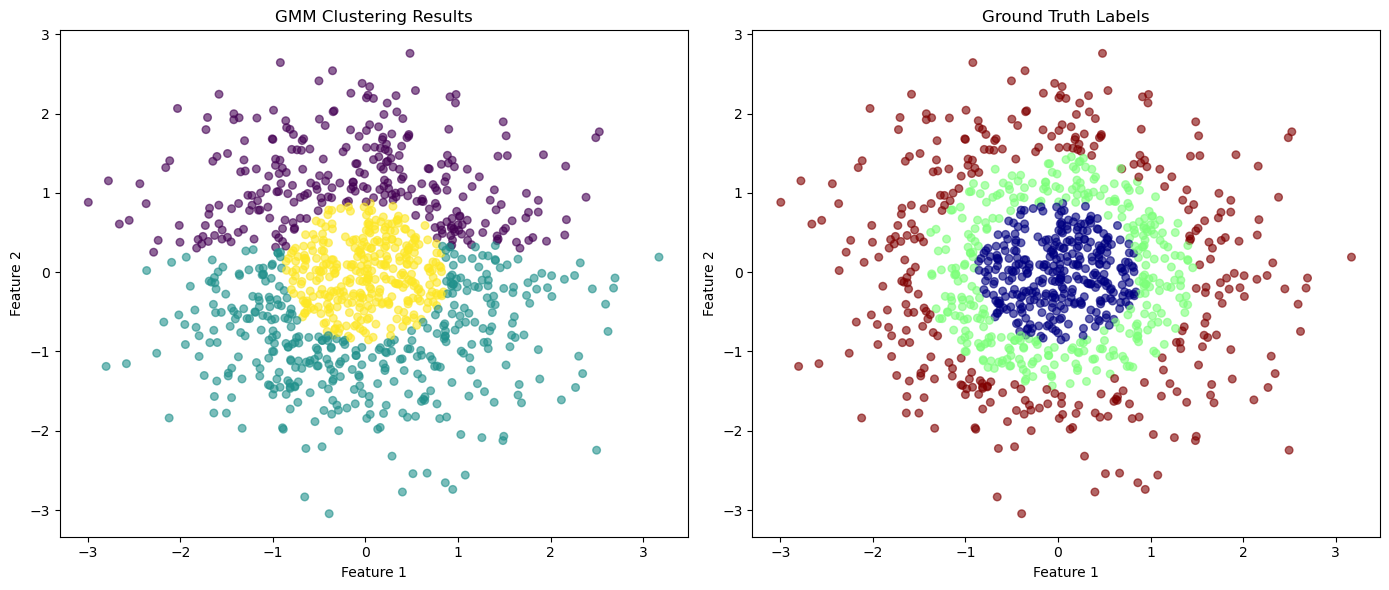

In [43]:
X, y = preprocess("Nested Clusters")
gmm = GaussianMixture(random_state=0)
grid_search = GridSearchCV(estimator=gmm, param_grid=params, cv=5)
grid_search.fit(X)


print("Best Parameters:", grid_search.best_params_)
print("Best BIC Score:", grid_search.best_score_)

# Plot the clustering results
best_gmm_model = grid_search.best_estimator_
plot_clustering_and_truth(X, y, best_gmm_model)

In [44]:
# Evaluate the model
evaluation_metrics = evaluate_gmm_model(X, y, best_gmm_model)

# Print the evaluation metrics
for metric, score in evaluation_metrics.items():
    print(f"{metric}: {score:.4f}")

Silhouette Score: 0.3201
Davies-Bouldin Score: 1.2312
Adjusted Rand Index: 0.5050


### GMM on Hierarchical Cluster

In [46]:
X, y = preprocess("Hierarchical Structure")
gmm = GaussianMixture(random_state=0)
grid_search = GridSearchCV(estimator=gmm, param_grid=params, cv=5)
grid_search.fit(X)


print("Best Parameters:", grid_search.best_params_)
print("Best BIC Score:", grid_search.best_score_)

# Plot the clustering results
best_gmm_model = grid_search.best_estimator_

# Predict clusters using the best model
gmm_result = best_gmm_model.predict(X)

# Create a DataFrame for visualization
df = pd.DataFrame(X, columns=['Gender_Male', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
df['GMM_Cluster'] = gmm_result

# Plot the 3D scatter plot
fig = px.scatter_3d(df, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)', color='GMM_Cluster',
                    title="3D GMM Clustering on Mall Customers Dataset", labels={'GMM_Cluster': 'Cluster'})
fig.update_traces(marker=dict(size=5)) 

fig.show()

c:\Users\liang\anaconda3\lib\site-packages\sklearn\mixture\_base.py:270: ConvergenceWarning:

Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.

c:\Users\liang\anaconda3\lib\site-packages\sklearn\mixture\_base.py:270: ConvergenceWarning:

Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.

c:\Users\liang\anaconda3\lib\site-packages\sklearn\mixture\_base.py:270: ConvergenceWarning:

Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.

c:\Users\liang\anaconda3\lib\site-packages\sklearn\mixture\_base.py:270: ConvergenceWarning:

Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.

c:\Users\liang\anaconda3\lib\site-packages\sklearn\mixture\_base.py:270:

Best Parameters: {'covariance_type': 'diag', 'init_params': 'random_from_data', 'max_iter': 100, 'n_components': 4, 'tol': 0.001}
Best BIC Score: -2.6211202397153053


### Performance Evaluation

In [47]:
# Evaluate the model
evaluation_metrics = evaluate_gmm_model(X, y, best_gmm_model, False)

# Print the evaluation metrics
for metric, score in evaluation_metrics.items():
    print(f"{metric}: {score:.4f}")

Silhouette Score: 0.2970
Davies-Bouldin Score: 1.1052
